```
Build an ANN model for Drug classification. 
This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, 
including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to 
develop a model that can accurately predict the class or category of a given drug based on its features. 
Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification
Task 1: Read the dataset and do data pre-processing
Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)
Task 3: Test the model with random data

```

In [62]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [64]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [65]:
df.shape

(200, 6)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [67]:
df.isnull().sum()
#no null values, so no replacement with median/mode requred

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [68]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [69]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [70]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [71]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

## Visualization

<ipython-input-72-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

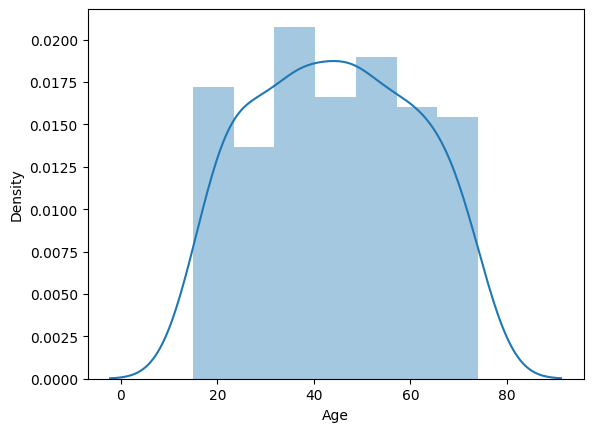

In [72]:
sns.distplot(df.Age)

<ipython-input-73-fda53b94c691>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Na_to_K)


<Axes: xlabel='Na_to_K', ylabel='Density'>

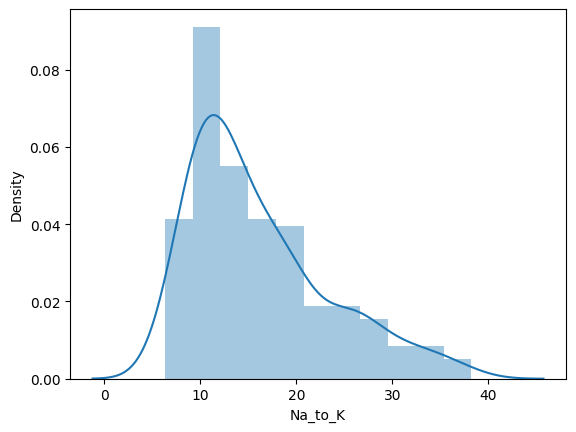

In [73]:
sns.distplot(df.Na_to_K)

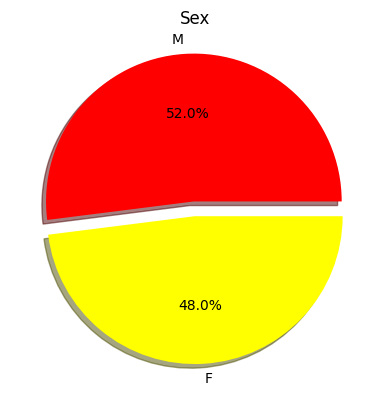

In [74]:
#Categorical Columns
#pie-plot = caterigorical column, value_count() is parameter
plt.pie(df.Sex.value_counts(),[0.1,0],labels=['M','F'], autopct="%1.1f%%" , colors=['red','yellow'], shadow=True)
plt.title('Sex')
plt.show() #to only  show piechart

## Outlier Detection and Replacement

<Axes: >

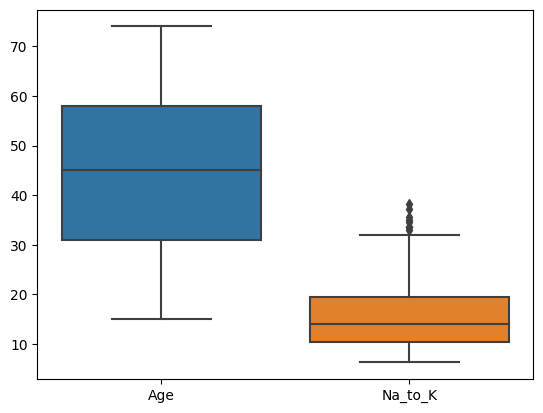

In [75]:
sns.boxplot(df)

In [76]:
# we can we've some outliers in Na_to_K, in upper limit
q1=df.Na_to_K.quantile(0.25)
q3=df.Na_to_K.quantile(0.75)

In [77]:
q1

10.4455

In [78]:
q3

19.38

In [79]:
#IQR value
IQR=q3-q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1-1.5*IQR

In [80]:
df.median()

<ipython-input-80-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [81]:
df['Na_to_K']=np.where(df['Na_to_K']>upper_limit,13.9365,df['Na_to_K'])
# since 13.9365 is median

<Axes: >

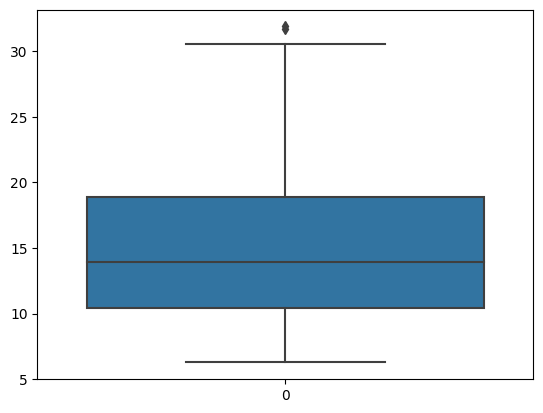

In [82]:
sns.boxplot(df.Na_to_K)

In [83]:
df.shape

(200, 6)

In [84]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Split the training and testing data

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x=df.iloc[:,:5]
# y= pd.get_dummies(df.iloc[:,5:]).values #one-hot encoding
# y
y=df['Drug']

In [87]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [88]:
xtest.shape

(40, 5)

In [89]:
#Doing Encoding-> using LabelEncoder

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [91]:
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtest['Sex'] = le.transform(xtest['Sex'])

In [92]:
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtest['BP'] = le.transform(xtest['BP'])

In [93]:
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])

In [94]:
print(xtrain)

     Age  Sex  BP  Cholesterol  Na_to_K
77    26    0   0            1   19.161
47    68    1   1            0   10.291
94    56    1   1            0   15.015
14    50    0   2            0   12.703
41    58    0   0            1   14.239
..   ...  ...  ..          ...      ...
3     28    0   2            0    7.798
130   70    0   2            0   20.489
134   42    0   0            0   21.036
155   49    1   1            0   10.537
75    26    1   1            1   20.909

[160 rows x 5 columns]


In [95]:
ytrain=le.fit_transform(ytrain)
ytest=le.transform(ytest)
print(ytrain)

[0 3 0 4 2 0 0 0 4 0 0 0 0 4 4 2 0 3 0 3 0 0 4 2 4 4 0 0 1 0 4 1 0 4 4 4 2
 1 0 4 4 4 0 0 4 1 4 1 0 1 0 0 4 1 0 3 1 1 1 4 1 0 0 4 0 1 0 2 3 0 3 1 0 4
 0 0 0 0 4 0 4 3 0 2 0 0 1 4 2 4 0 4 0 0 0 4 2 4 1 3 0 4 4 0 0 0 3 0 4 3 0
 2 0 0 0 0 0 4 0 0 2 0 4 4 1 4 1 0 0 0 4 4 0 0 3 2 0 1 4 0 3 0 0 4 0 0 1 4
 0 0 0 0 0 1 1 4 0 0 3 0]


## Building ANN Model

In [96]:
# Build an ANN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [97]:
# Initializing the seq model
clf_model = Sequential()
# Adding the input layer to the model
clf_model.add(Dense(5,activation='relu'))
# Adding the 1st hidden layer to the model
clf_model.add(Dense(12,activation='relu'))
# Adding the 2nd hidden layer to the model
clf_model.add(Dense(10,activation='relu'))
# Adding output layer
clf_model.add(Dense(1,activation='softmax'))

In [98]:
clf_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# in binary-classification -> binary_crossentropy should be loss

### Testing the Model

In [99]:
#Encoding the testing data
ypred = clf_model.predict(xtest)
print(ypred)

2/2 [==============================] - 0s 3ms/step
[[0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]]


In [100]:
# Comparing predicted with the actual value
clf_model.summary()
comp = pd.DataFrame(ytest)  # Creating a dataframe
comp.columns = ['Actual Value']  # Changing the column name
comp['Predicted values'] = ypred  # Creating a column based onth prediction
comp

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 5)                 30        
                                                                 
 dense_21 (Dense)            (None, 12)                72        
                                                                 
 dense_22 (Dense)            (None, 10)                130       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


,Actual Value,Predicted values
0,0,1.0
1,4,1.0
2,0,1.0
3,0,1.0
4,4,1.0
5,0,1.0
6,1,1.0
7,4,1.0
8,0,1.0
9,3,1.0
